<a href="https://colab.research.google.com/github/vigneshwarjayabal/Data_Cleaning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Cleaning using Pandas and Python**

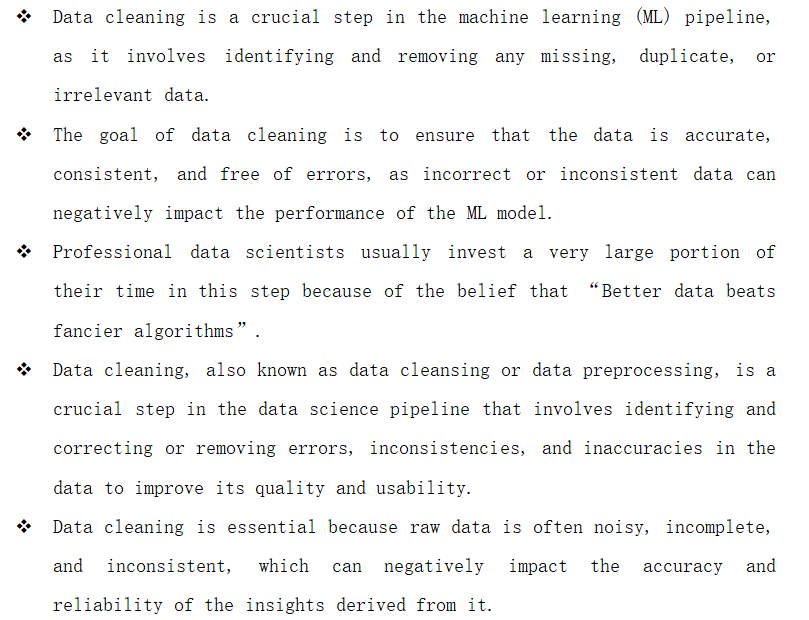

In [ ]:
#steps for data cleaning
#1 data availability / data understanding
#2 spell check
#3 handling null and duplicate values
#4 handling data types and duplicate after conversion
#5 date time conversion(1. convert into pandas understandable format  2.handling based on senario)
#6 convert object and string into meaning full numeric values(for mechinelearning purpose)


#**Step1: Data Availability / Data Understanding**

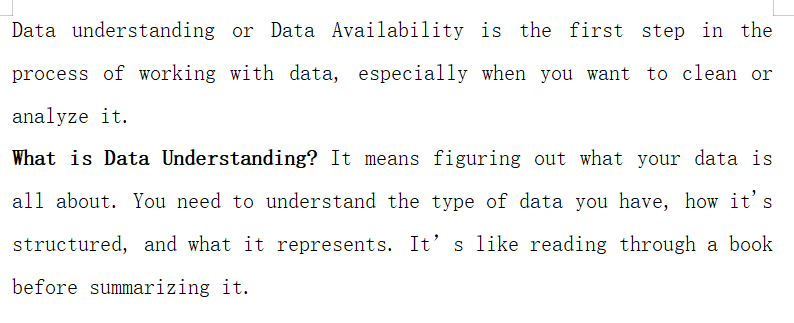

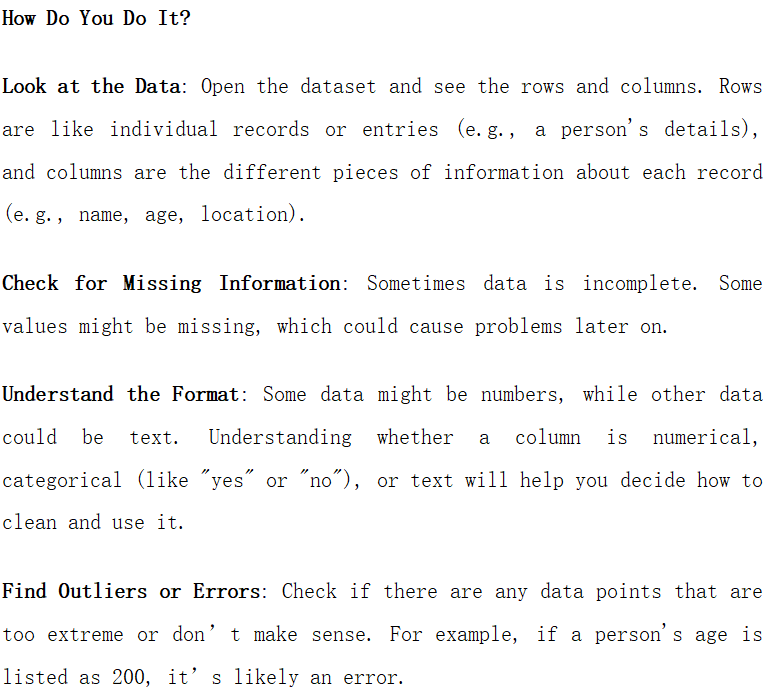

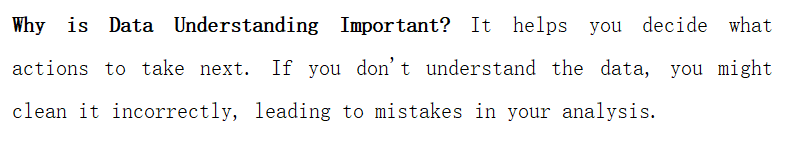

In [ ]:
import pandas as pd

chennai_sales = pd.read_csv('/content/drive/MyDrive/data_cleaning/train-chennai-sale.csv')

pd.set_option("display.max_column",None)

In [ ]:
chennai_sales

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
chennai_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

#**Step 2: Spell Check**

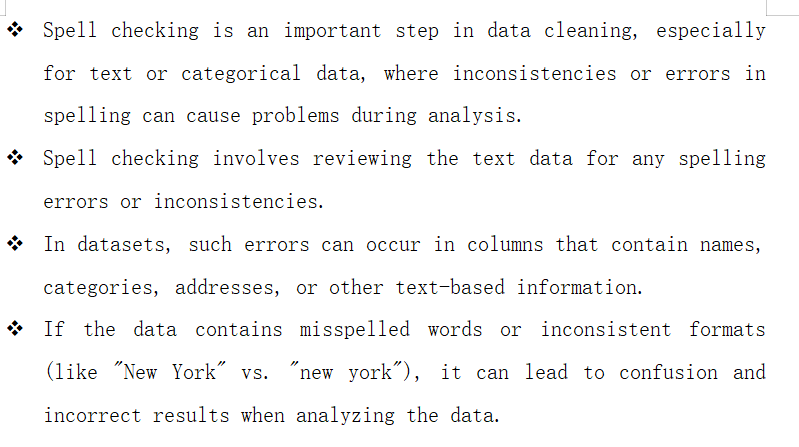

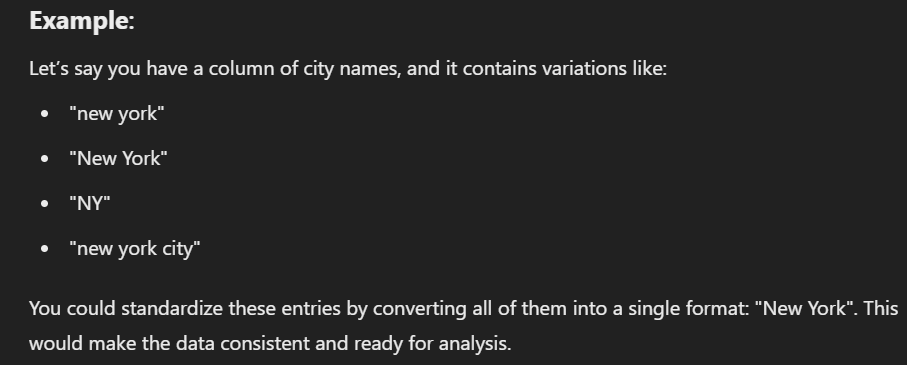

In [ ]:
chennai_sales['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
# '''In above area Column we see incorrect spelling for few area like Anna Nagar --> Ann Nagar, Ana Anagr
# this will make data inconsistencies due to error in spelling.'''



In [ ]:
chennai_sales['AREA'] = chennai_sales["AREA"].apply(lambda i:"Anna Nagar" if (i == "Ann Nagar" or i == "Ana Nagar") else i)

# ''' This code will iterate each row in area column if it see Ann Nagar, Ana Anagr spelling then it will replace it with Anna Nager.
# so now i am going to do this to all area name in area column.'''

In [ ]:
chennai_sales['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Chormpet', 'Adyr', 'Velchery', 'KKNagar'], dtype=object)

In [ ]:
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Karapakkam" if (i == "Karapakam" ) else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Adyar" if (i == "Adyr") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Velachery" if (i == "Velchery") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"Chrompet" if (i == "Chrompt" or i == "Chrmpet" or i =="Chormpet") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"KK Nagar" if (i == "KKNagar") else i)
chennai_sales['AREA']=chennai_sales["AREA"].apply(lambda i:"T Nagar" if (i == "TNagar") else i)


In [ ]:
chennai_sales['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
# ''' before spell check we had 17 unique values in area column but after correct then spelling we have only 7 unique value in area column.
# spell check is important to solve data inconsistent'''

In [ ]:
chennai_sales

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Area
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000,Karapakkam
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,Anna Nagar
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,Adyar
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290,Velachery
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250,Karapakkam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,Karapakkam
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,Velachery
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410,Velachery
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,Karapakkam


In [ ]:
chennai_sales.set_index("PRT_ID",inplace=True)

In [ ]:
for i in chennai_sales.select_dtypes(include=["object"]).columns:
  print(i,chennai_sales[i].unique())

AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
PARK_FACIL ['Yes' 'No' 'Noo']
BUILDTYPE ['Commercial' 'Others' 'Other' 'House' 'Comercial']
UTILITY_AVAIL ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
STREET ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']
Area ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Chormpet' 'Adyr'
 'Velchery' 'KKNagar']


In [ ]:
# solving error for remaining column

chennai_sales['SALE_COND']=chennai_sales["SALE_COND"].apply(lambda i:"AbNormal" if (i == "Ab Normal") else i)
chennai_sales['SALE_COND']=chennai_sales["SALE_COND"].apply(lambda i:"Partial" if (i == "Partiall" or i == "PartiaLl") else i)
chennai_sales['SALE_COND']=chennai_sales["SALE_COND"].apply(lambda i:"AdjLand" if (i == "Adj Land") else i)
chennai_sales['PARK_FACIL']=chennai_sales["PARK_FACIL"].apply(lambda i:"No" if (i == "Noo") else i)
chennai_sales['BUILDTYPE']=chennai_sales["BUILDTYPE"].apply(lambda i:"Commercial" if (i == "Comercial") else i)
chennai_sales['BUILDTYPE']=chennai_sales["BUILDTYPE"].apply(lambda i:"Others" if (i == "Other") else i)
chennai_sales['UTILITY_AVAIL']=chennai_sales["UTILITY_AVAIL"].apply(lambda i:"No sewage" if (i == "NoSewr " or i == "NoSeWa") else i)  #sewage
chennai_sales['UTILITY_AVAIL']=chennai_sales["UTILITY_AVAIL"].apply(lambda i:"AllPub" if (i == "All Pub") else i)
chennai_sales['STREET']=chennai_sales['STREET'].apply(lambda i:"Paved" if ( i == "Pavd") else i )
chennai_sales['STREET']=chennai_sales['STREET'].apply(lambda i:"No Access" if ( i == "NoAccess") else i )

In [ ]:
chennai_sales.drop('Area', axis=1, inplace=True)

In [ ]:
for i in chennai_sales.select_dtypes(include=["object"]).columns:
  print(i,chennai_sales[i].unique())

AREA ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
SALE_COND ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
PARK_FACIL ['Yes' 'No']
BUILDTYPE ['Commercial' 'Others' 'House']
UTILITY_AVAIL ['AllPub' 'ELO' 'No sewage']
STREET ['Paved' 'Gravel' 'No Access']
MZZONE ['A' 'RH' 'RL' 'I' 'C' 'RM']


#**Step 3: Handling null and duplicate values**

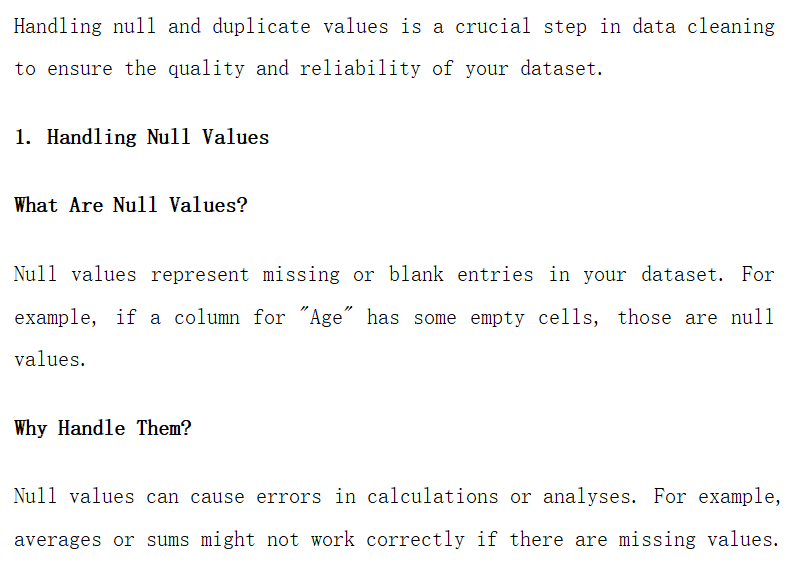

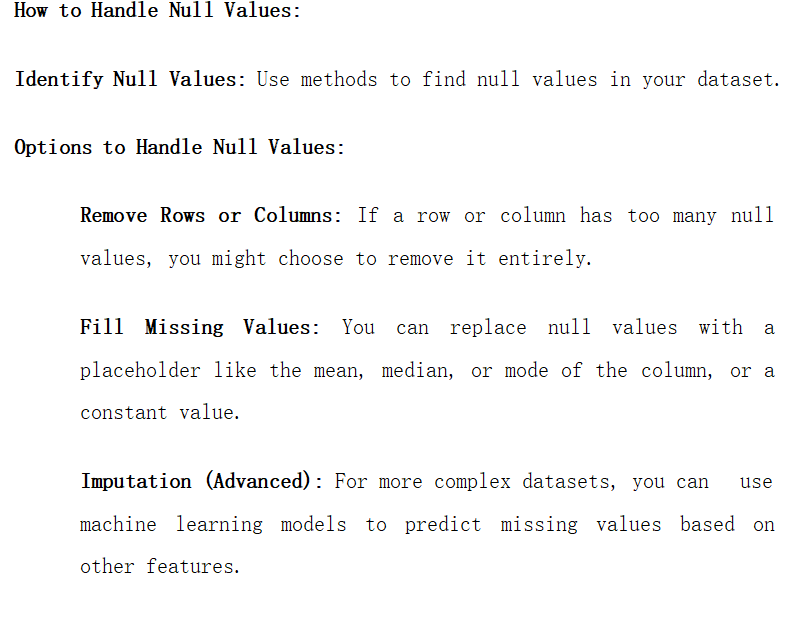

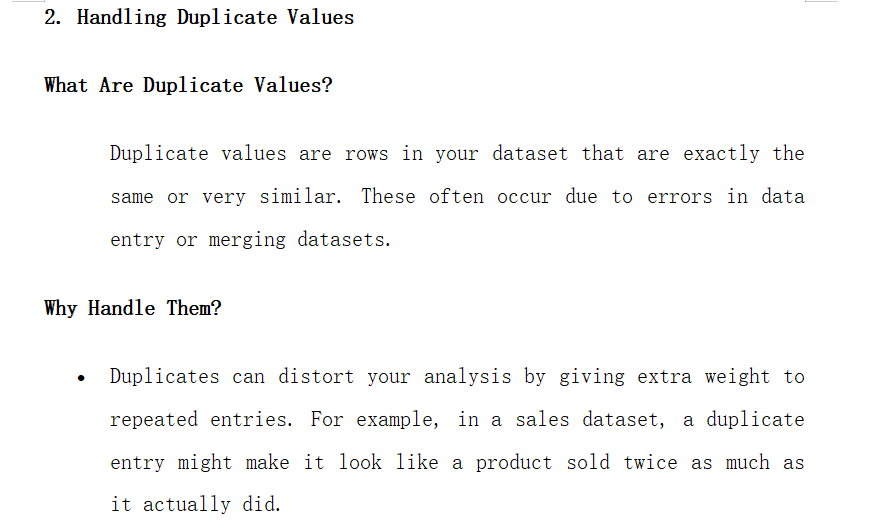

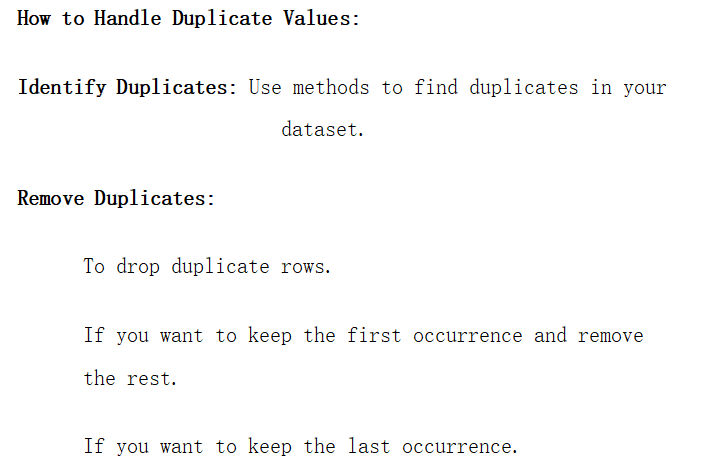

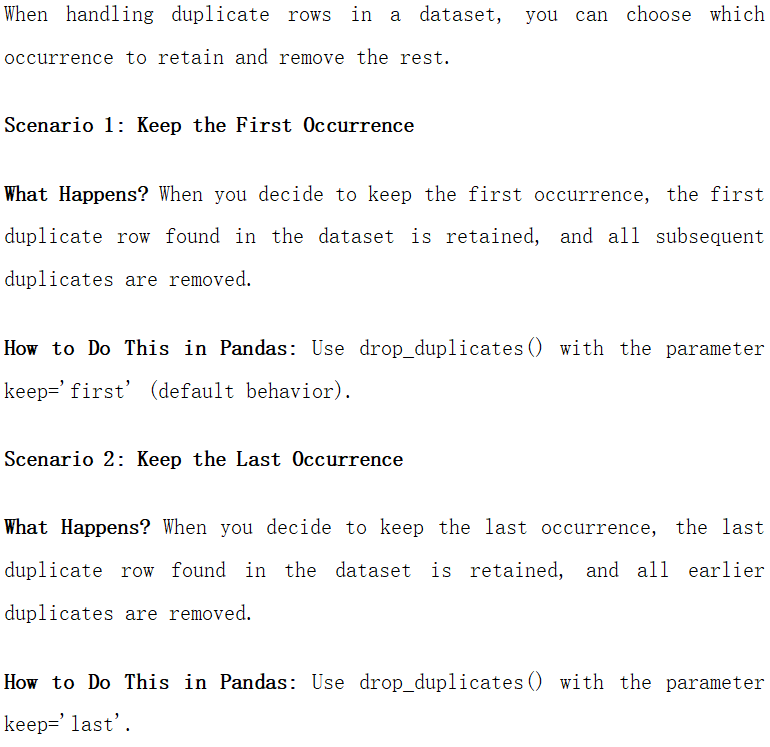

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df2  = pd.read_csv('/content/drive/MyDrive/data_cleaning/SAMPLE.csv')

In [3]:
df2

,sl No,name,college,hsc,SSLC,arrears,cmark
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,NaN
3,3.0,A3,ANNA UNIVERSITY,NaN,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,NaN,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,NaN,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5


In [4]:
df2.isnull()

,sl No,name,college,hsc,SSLC,arrears,cmark
0,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
 # '''this is for isnull() method
#      if there is any value in column or row in the dataset is null ---> true
 #     if there is any value in column or row in the dataset is not null ---> false'''

In [5]:
df2.notnull()

,sl No,name,college,hsc,SSLC,arrears,cmark
0,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False
3,True,True,True,False,True,True,True
4,True,True,True,True,True,True,True
5,True,True,False,True,True,True,True
6,True,True,True,True,True,True,True
7,True,True,True,True,False,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


In [ ]:
 # '''this is for not null() method
#      if there is any value in column or row in the dataset is null ---> false
 #     if there is any value in column or row in the dataset is not null ---> true '''

In [6]:
# This command in Pandas is used to count the number of missing (null) values in each column of a DataFrame .
# It provides a clear summary of which columns contain missing data and how many entries are missing.
df2.isnull().sum()

,0
sl No,3
name,3
college,5
hsc,5
SSLC,5
arrears,4
cmark,4


In [ ]:
# '''So handling the null value will be based on the understand the dataset,scenario.
# for example:
#   1) i have dataset with id and temperature:
#       id    temp
#       15    23.3
#       16    23.3
#       17    NAN
#       18    23.3

#       for this case we can replace any value from the above row or below row as the value dont change before and after the row which has null value
#   2)
#       id   temp
#       15   23.3
#       16   28.3
#       17   NAN
#       18   27.6

#       now you see different value for each row so i can find mean and replace the null with mean value .

#       so for this first important think is to understand the dataset and undersatnd relation among the column in dataset.

#       but company project you should ask what to do for null value or inform them i am going to do this for handling null values. '''

In [7]:
#this code is used  replace null values with a placeholder like the mean, median, or mode of the column, or a constant value.
df2.fillna(123)

,sl No,name,college,hsc,SSLC,arrears,cmark
0,123.0,123,123,123.00,123.0,123.0,123.0
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,123.0
3,3.0,A3,ANNA UNIVERSITY,123.00,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,123,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,123.0,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5


In [8]:
df2.fillna(method = 'bfill')
# this is backward filling: It fills the null values in a column with the next valid (non-null) value from below in the same column.
#If there is no valid value below, the null value remains as is.

<ipython-input-8-1c0ec4c5f2ee>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method = 'bfill')


,sl No,name,college,hsc,SSLC,arrears,cmark
0,1.0,A1,IITM,89.90,92.6,0.0,95.0
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,99.0
3,3.0,A3,ANNA UNIVERSITY,92.50,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,SRM,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,65.8,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5


In [9]:
df2.fillna(method = 'ffill')
# this is forward filling : It fills the null values in a column with the most recent valid (non-null) value from above in the same column.
# If there is no valid value above, the null value remains as is.

<ipython-input-9-c2392f9e6d69>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2.fillna(method = 'ffill')


,sl No,name,college,hsc,SSLC,arrears,cmark
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,95.0
3,3.0,A3,ANNA UNIVERSITY,76.80,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,ANAMALAI UNIVERSITY,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,88.1,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5


In [14]:
df2['hsc'].fillna(df2['hsc'].mean(),inplace = True)

<ipython-input-14-e6b22ff5adbd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['hsc'].fillna(df2['hsc'].mean(),inplace = True)


In [15]:
df2

,sl No,name,college,hsc,SSLC,arrears,cmark
0,NaN,NaN,NaN,88.052667,NaN,NaN,NaN
1,1.0,A1,IITM,89.900000,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.800000,77.9,3.0,NaN
3,3.0,A3,ANNA UNIVERSITY,88.052667,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.500000,94.6,1.0,76.0
5,5.0,A5,NaN,79.300000,65.0,2.0,89.0
6,6.0,A6,SRM,99.800000,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.800000,NaN,7.0,78.3
8,8.0,A8,SAVEETHA,99.800000,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.800000,99.8,5.0,77.5


In [16]:
# The dropna() method in Pandas is used to remove rows or columns with missing values (null/NaN values) from a DataFrame or Series.
# It is a powerful tool for cleaning data by eliminating incomplete entries.

df3 = pd.read_csv('/content/drive/MyDrive/data_cleaning/SAMPLE.csv')

In [17]:
df3.dropna()

,sl No,name,college,hsc,SSLC,arrears,cmark
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5
13,9.0,A9,ANAMALAI UNIVERSITY,98.70,91.0,2.0,76.0
15,11.0,A10,IITM,94.00,77.6,1.0,75.0
17,13.0,A12,dhgvuicbh,78.90,84.9,3.0,83.0
18,14.0,A13,SRM,86.90,97.0,33.0,92.0
19,3.0,A3,ANNA UNIVERSITY,88.39,85.6,6.0,99.0


In [18]:
# how:
# 'any' (default): Drops rows/columns if any value is null.
# 'all': Drops rows/columns if all values are null.

# subset:
# Specifies a list of column labels to consider when checking for null values.
# inplace:
# False (default): Returns a new DataFrame with null values dropped.
# True: Modifies the original DataFrame in place.

In [19]:
df3.dropna(how = 'all')

,sl No,name,college,hsc,SSLC,arrears,cmark
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,NaN
3,3.0,A3,ANNA UNIVERSITY,NaN,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,NaN,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,NaN,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5
10,3.0,A3,ANNA UNIVERSITY,NaN,85.6,6.0,99.0


In [20]:
df3.dropna(how='any',subset=["college","hsc"])

,sl No,name,college,hsc,SSLC,arrears,cmark
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,NaN
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,NaN,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5
13,9.0,A9,ANAMALAI UNIVERSITY,98.70,91.0,2.0,76.0
14,10.0,AD,fogjof,56.00,9.0,NaN,2.0
15,11.0,A10,IITM,94.00,77.6,1.0,75.0


In [21]:
df4 = df3.fillna(method='bfill')

<ipython-input-21-d0dbb86e23e0>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df4 = df3.fillna(method='bfill')


In [22]:
df4

,sl No,name,college,hsc,SSLC,arrears,cmark
0,1.0,A1,IITM,89.90,92.6,0.0,95.0
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,99.0
3,3.0,A3,ANNA UNIVERSITY,92.50,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,SRM,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,65.8,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5


In [23]:
df4.duplicated()
# '''The duplicated() method in Pandas is used to identify duplicate rows in a DataFrame or Series.
# It returns a Boolean Series indicating whether each row (or value in a Series) is a duplicate.'''

,0
0,False
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [24]:
# keep:
# 'first' (default): Marks duplicates as True, except for the first occurrence.
# 'last': Marks duplicates as True, except for the last occurrence.
# False: Marks all duplicates as True.

# subset:
# Specifies the column(s) to consider when identifying duplicates.
# Default is None, meaning all columns are considered.

# Return Value:
# A Boolean Series where:
# True indicates a duplicate row/value.
# False indicates a unique row/value.

In [25]:
df4.duplicated(keep = 'first')

,0
0,False
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [26]:
df4.duplicated(keep = 'last')

,0
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [27]:
df4.duplicated(keep = False)

,0
0,True
1,True
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [29]:
df4.duplicated(subset=['hsc'])

#checking duplicates based on column name "hsc"

,0
0,False
1,True
2,False
3,False
4,True
5,False
6,False
7,False
8,True
9,True


In [30]:
# The drop_duplicates() method in Pandas is used to remove duplicate rows from a DataFrame or duplicate values from a Series.
# It provides flexibility to keep the first, last, or none of the duplicates, depending on your requirements.


df4.drop_duplicates(keep = 'first')

,sl No,name,college,hsc,SSLC,arrears,cmark
0,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,99.0
3,3.0,A3,ANNA UNIVERSITY,92.50,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,SRM,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,65.8,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5
10,3.0,A3,ANNA UNIVERSITY,98.70,85.6,6.0,99.0


In [31]:
df4.drop_duplicates(keep = 'last')

,sl No,name,college,hsc,SSLC,arrears,cmark
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,99.0
3,3.0,A3,ANNA UNIVERSITY,92.50,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,SRM,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,65.8,7.0,78.3
8,8.0,A8,SAVEETHA,99.80,65.8,66.0,77.5
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5
10,3.0,A3,ANNA UNIVERSITY,98.70,85.6,6.0,99.0


In [32]:
df4.drop_duplicates(keep = 'last', subset=["college","hsc"])

,sl No,name,college,hsc,SSLC,arrears,cmark
1,1.0,A1,IITM,89.90,92.6,0.0,95.0
2,2.0,A2,ANNA UNIVERSITY,76.80,77.9,3.0,99.0
3,3.0,A3,ANNA UNIVERSITY,92.50,85.6,6.0,99.0
4,4.0,A4,ANAMALAI UNIVERSITY,92.50,94.6,1.0,76.0
5,5.0,A5,SRM,79.30,65.0,2.0,89.0
6,6.0,A6,SRM,99.80,88.1,0.0,89.6
7,7.0,A7,SAVEETHA,91.80,65.8,7.0,78.3
9,56.0,A34,SAVEETHA,99.80,99.8,5.0,77.5
10,3.0,A3,ANNA UNIVERSITY,98.70,85.6,6.0,99.0
13,9.0,A9,ANAMALAI UNIVERSITY,98.70,91.0,2.0,76.0


In [33]:
df = pd.read_csv('/content/drive/MyDrive/data_cleaning/train-chennai-sale.csv')

In [34]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [35]:
df.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


In [36]:
val_col=["QS_ROOMS","QS_BATHROOM","QS_BEDROOM"]
target_col="QS_OVERALL"
def fill_null_QS_OVERALL(row):
  if pd.isnull(row[target_col]):
    return row[val_col].mean()
  else:
    return row[target_col]

df[target_col]=df.apply(fill_null_QS_OVERALL,axis=1)

In [37]:
df[target_col]=df.apply(fill_null_QS_OVERALL,axis=1)

In [38]:
df.isnull().sum()

,0
PRT_ID,0
AREA,0
INT_SQFT,0
DATE_SALE,0
DIST_MAINROAD,0
N_BEDROOM,1
N_BATHROOM,5
N_ROOM,0
SALE_COND,0
PARK_FACIL,0


#**Step4: Handling data types  after conversion**

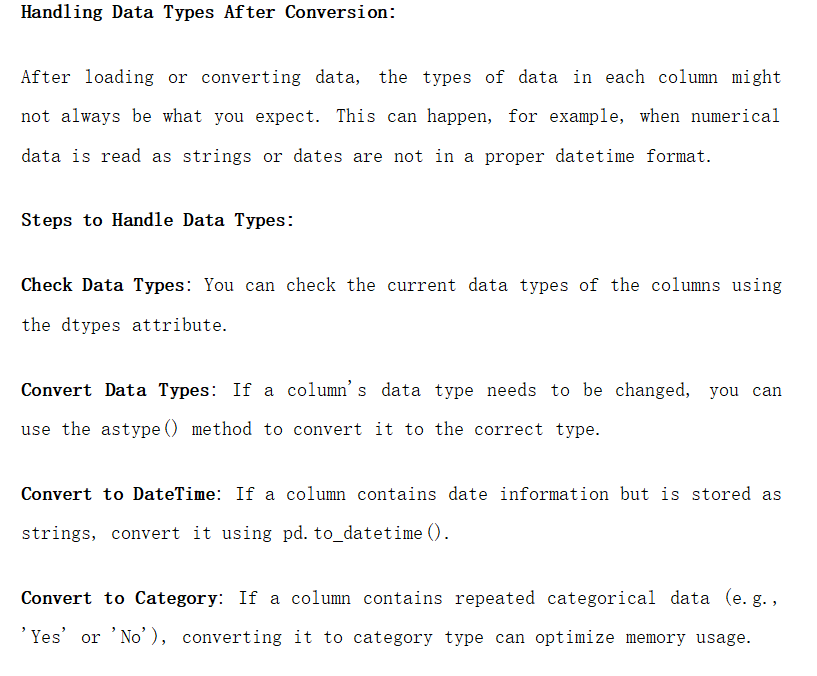

In [40]:
df = pd.read_csv('/content/drive/MyDrive/data_cleaning/train-chennai-sale.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [43]:
# ''' we see most of the column is in object datatype .'''

df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,object
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object


In [46]:
# Convert Data Types: If a column's data type needs to be changed, you can use the astype() method to convert it to the correct type.
# syntax: df['Column'] = df['Column'].astype('desired_type')



In [47]:

df['INT_SQFT'] = df['INT_SQFT'].astype(int)

In [48]:
df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,object
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object


In [ ]:
# Convert to DateTime: If a column contains date information but is stored as strings, convert it using pd.to_datetime().
# syntax: df['Date_Column'] = pd.to_datetime(df['Date_Column'])

In [49]:
df['DATE_SALE']=pd.to_datetime(df["DATE_SALE"],format="%d-%m-%Y")
df['DATE_BUILD']=pd.to_datetime(df["DATE_BUILD"],format="%d-%m-%Y")

In [50]:
df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,datetime64[ns]
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,object


In [51]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-01-03,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,2004-04-08,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,2006-08-25,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,2009-08-03,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
# Convert to Category: If a column contains repeated categorical data (e.g., 'Yes' or 'No'), converting it to category type can optimize memory usage.
# Syntax : df['Category_Column'] = df['Category_Column'].astype('category')

In [52]:
df['PARK_FACIL'] = df['PARK_FACIL'].astype('category')

In [54]:
df.dtypes

,0
PRT_ID,object
AREA,object
INT_SQFT,int64
DATE_SALE,datetime64[ns]
DIST_MAINROAD,int64
N_BEDROOM,float64
N_BATHROOM,float64
N_ROOM,int64
SALE_COND,object
PARK_FACIL,category


#**Step 5 :date time conversion**

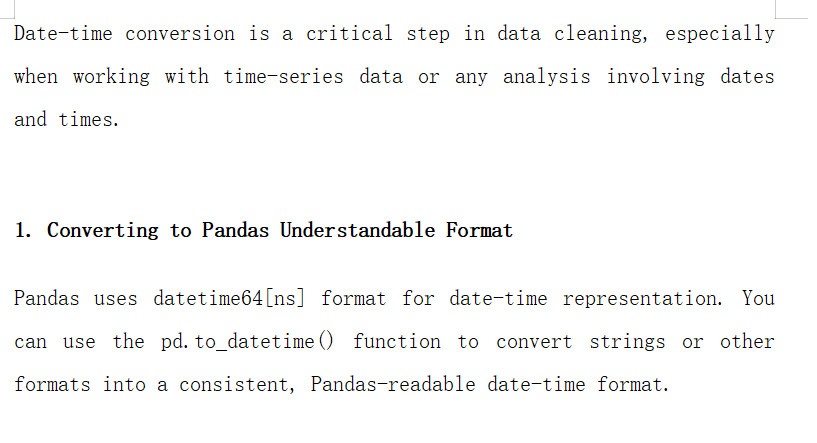

In [55]:
# Convert to DateTime: If a column contains date information but is stored as strings, convert it using pd.to_datetime().
# syntax: df['Date_Column'] = pd.to_datetime(df['Date_Column'])

In [56]:
df['DATE_SALE']=pd.to_datetime(df["DATE_SALE"],format="%d-%m-%Y")
df['DATE_BUILD']=pd.to_datetime(df["DATE_BUILD"],format="%d-%m-%Y")

In [ ]:
# Explanation:

# pd.to_datetime() automatically infers date formats and converts them.

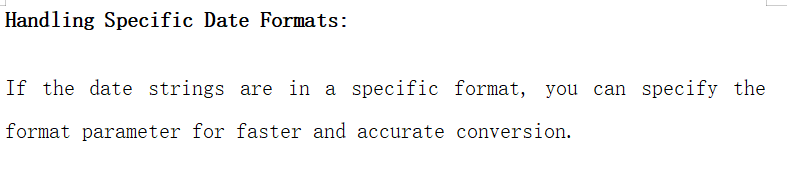


Syntax:

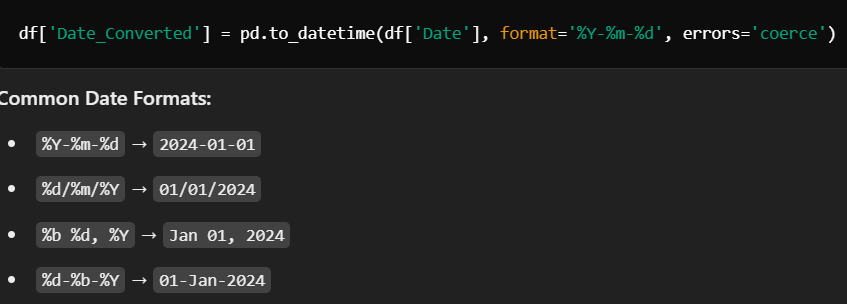

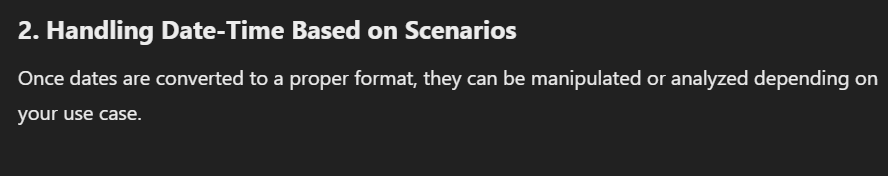

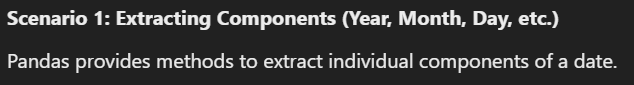

In [57]:
df['Year_of_sales'] = df['DATE_SALE'].dt.year
df['Month_of_sales'] = df['DATE_SALE'].dt.month
df['Day_of_sales'] = df['DATE_SALE'].dt.day
df['Weekday_of_sales'] = df['DATE_SALE'].dt.day_name()

In [58]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Year_of_sales,Month_of_sales,Day_of_sales,Weekday_of_sales
0,P03210,Karapakkam,1004,2011-05-04,131,1.0,1.0,3,AbNormal,Yes,...,3.9,4.9,4.330,380000,144400,7600000,2011,5,4,Wednesday
1,P09411,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,...,4.2,2.5,3.765,760122,304049,21717770,2006,12,19,Tuesday
2,P01812,Adyar,909,2012-02-04,70,1.0,1.0,3,AbNormal,Yes,...,3.8,2.2,3.090,421094,92114,13159200,2012,2,4,Saturday
3,P05346,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,...,3.9,3.6,4.010,356321,77042,9630290,2010,3,13,Saturday
4,P06210,Karapakkam,1226,2009-10-05,84,1.0,1.0,3,AbNormal,Yes,...,2.5,4.1,3.290,237000,74063,7406250,2009,10,5,Monday


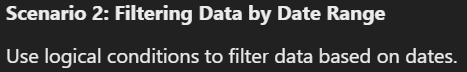

In [60]:
filtered_df = df[df['DATE_SALE'] > '2005-01-02']

print(filtered_df)

      PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004 2011-05-04            131        1.0   
1     P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2     P01812       Adyar       909 2012-02-04             70        1.0   
3     P05346   Velachery      1855 2010-03-13             14        3.0   
4     P06210  Karapakkam      1226 2009-10-05             84        1.0   
...      ...         ...       ...        ...            ...        ...   
7103  P05133  Karapakkam      1462 2010-04-23             68        2.0   
7104  P03834  Karapakkam       598 2011-01-03             51        1.0   
7106  P09594   Velachery      1614 2006-08-25            152        2.0   
7107  P06508  Karapakkam       787 2009-08-03             40        1.0   
7108  P09794   Velachery      1896 2005-07-13            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... QS_BATHROOM QS_BEDROOM  \
0            1.0   

In [61]:
filtered_df = df[df['DATE_SALE'] < '2005-01-02']

print(filtered_df)

      PRT_ID       AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
226   P09994  Velachery      1517 2004-04-24             82        2.0   
275   P09906  Velachery      1615 2004-11-03             31        2.0   
380   P09981  Velachery      1513 2004-05-25            128        2.0   
384   P09872  Velachery      1726 2004-12-31             19        2.0   
386   P09951  Velachery      1550 2004-07-16             53        2.0   
...      ...        ...       ...        ...            ...        ...   
6784  P09997  Velachery      1677 2004-04-12            137        2.0   
6887  P09958  Velachery      1633 2004-07-10             10        2.0   
6911  P09930  Velachery      1661 2004-08-30            116        2.0   
7004  P09974  Velachery      1933 2004-06-09            196        3.0   
7105  P10000  Velachery      1897 2004-04-08             52        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... QS_BATHROOM QS_BEDROOM  \
226          1.0       4  Norma

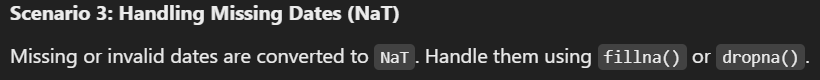

In [62]:
df["DATE_SALE"].isnull()

,DATE_SALE
0,False
1,False
2,False
3,False
4,False
...,...
7104,False
7105,False
7106,False
7107,False


In [ ]:
# solution:
# # Fill missing dates with a default date
# df['Date_Converted'] = df['Date_Converted'].fillna(pd.Timestamp('2024-01-01'))

# # Alternatively, drop rows with missing dates
# df = df.dropna(subset=['Date_Converted'])

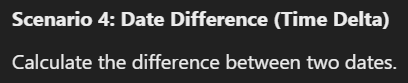

In [63]:
data = {'Start_Date': ['2024-01-01', '2024-01-10'],
        'End_Date': ['2024-01-05', '2024-01-20']}
df = pd.DataFrame(data)

# Convert to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Calculate the difference
df['Date_Difference'] = df['End_Date'] - df['Start_Date']

print(df)

  Start_Date   End_Date Date_Difference
0 2024-01-01 2024-01-05          4 days
1 2024-01-10 2024-01-20         10 days


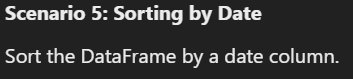

In [65]:
df = pd.read_csv('/content/drive/MyDrive/data_cleaning/train-chennai-sale.csv')
df = df.sort_values(by='DATE_SALE')

In [66]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
936,P09871,Velachery,1770,01-01-2005,138,2.0,1.0,4,Partial,No,...,ELO,Paved,RH,4.1,3.3,2.5,3.260,264990,170962,8548080
2052,P09372,Anna Nagar,1595,01-01-2007,39,1.0,1.0,4,Family,Yes,...,ELO,Paved,RH,4.5,3.6,2.6,3.515,315355,221917,11679830
3282,P09371,Chrompet,1245,01-01-2007,134,2.0,1.0,4,Family,Yes,...,ELO,No Access,RL,4.2,3.1,2.4,3.220,355260,136639,13663850
13,P09370,Adyar,1056,01-01-2007,83,1.0,1.0,3,Partial,Yes,...,NoSewr,Paved,RH,2.2,3.4,3.7,3.190,319141,37546,9386490
4722,P08438,Anna Nagar,1785,01-01-2008,148,1.0,1.0,4,Partial,Yes,...,NoSewr,Gravel,RH,4.4,4.4,3.2,3.920,436974,62425,12484960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,P01999,Anna Nagar,1976,31-12-2011,112,2.0,1.0,5,Partial,No,...,NoSeWa,Paved,RL,5.0,2.9,2.2,3.355,369002,110700,12300050
1076,P01998,Anna Nagar,1943,31-12-2011,108,2.0,1.0,5,Normal Sale,No,...,NoSewr,Paved,RL,3.4,3.2,2.4,2.950,380125,267495,14078710
1215,P01093,Chrompet,847,31-12-2012,6,1.0,1.0,3,Family,Yes,...,AllPub,Paved,RM,4.2,3.8,2.4,3.500,223286,107177,8931450
925,P00568,Chrompet,996,31-12-2013,92,1.0,1.0,3,Family,Yes,...,NoSeWa,Gravel,RL,3.9,3.6,2.6,3.390,255609,29493,9831120


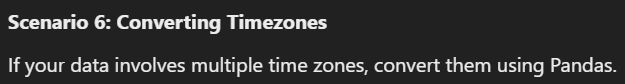

In [ ]:
# df['Date_Converted'] = df['Date_Converted'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')

#**Step 6: convert object and string into meaning full numeric values(for mechinelearning purpose)**

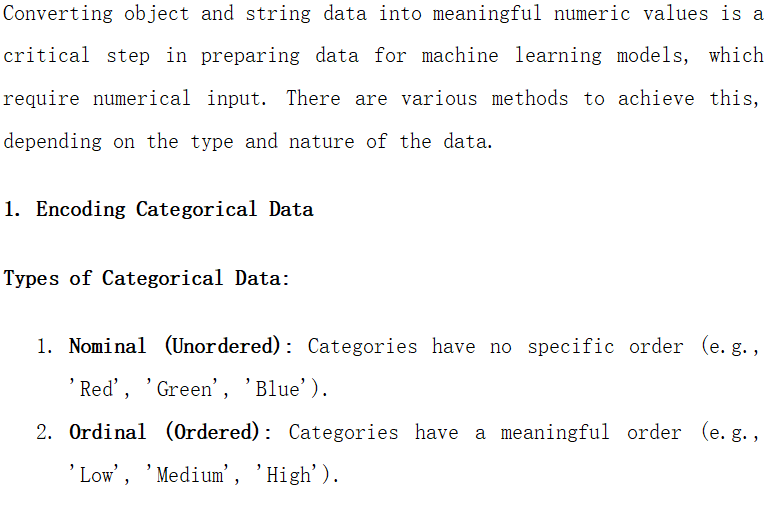

In [68]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({"Yes": 1,"No": 0})

In [69]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
936,P09871,Velachery,1770,01-01-2005,138,2.0,1.0,4,Partial,0,...,ELO,Paved,RH,4.1,3.3,2.5,3.260,264990,170962,8548080
2052,P09372,Anna Nagar,1595,01-01-2007,39,1.0,1.0,4,Family,1,...,ELO,Paved,RH,4.5,3.6,2.6,3.515,315355,221917,11679830
3282,P09371,Chrompet,1245,01-01-2007,134,2.0,1.0,4,Family,1,...,ELO,No Access,RL,4.2,3.1,2.4,3.220,355260,136639,13663850
13,P09370,Adyar,1056,01-01-2007,83,1.0,1.0,3,Partial,1,...,NoSewr,Paved,RH,2.2,3.4,3.7,3.190,319141,37546,9386490
4722,P08438,Anna Nagar,1785,01-01-2008,148,1.0,1.0,4,Partial,1,...,NoSewr,Gravel,RH,4.4,4.4,3.2,3.920,436974,62425,12484960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,P01999,Anna Nagar,1976,31-12-2011,112,2.0,1.0,5,Partial,0,...,NoSeWa,Paved,RL,5.0,2.9,2.2,3.355,369002,110700,12300050
1076,P01998,Anna Nagar,1943,31-12-2011,108,2.0,1.0,5,Normal Sale,0,...,NoSewr,Paved,RL,3.4,3.2,2.4,2.950,380125,267495,14078710
1215,P01093,Chrompet,847,31-12-2012,6,1.0,1.0,3,Family,1,...,AllPub,Paved,RM,4.2,3.8,2.4,3.500,223286,107177,8931450
925,P00568,Chrompet,996,31-12-2013,92,1.0,1.0,3,Family,1,...,NoSeWa,Gravel,RL,3.9,3.6,2.6,3.390,255609,29493,9831120


In [70]:
df['PARK_FACIL'] = df['PARK_FACIL'].map({"Yes": 1,"No": 0})

In [71]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
936,P09871,Velachery,1770,01-01-2005,138,2.0,1.0,4,Partial,NaN,...,ELO,Paved,RH,4.1,3.3,2.5,3.260,264990,170962,8548080
2052,P09372,Anna Nagar,1595,01-01-2007,39,1.0,1.0,4,Family,NaN,...,ELO,Paved,RH,4.5,3.6,2.6,3.515,315355,221917,11679830
3282,P09371,Chrompet,1245,01-01-2007,134,2.0,1.0,4,Family,NaN,...,ELO,No Access,RL,4.2,3.1,2.4,3.220,355260,136639,13663850
13,P09370,Adyar,1056,01-01-2007,83,1.0,1.0,3,Partial,NaN,...,NoSewr,Paved,RH,2.2,3.4,3.7,3.190,319141,37546,9386490
4722,P08438,Anna Nagar,1785,01-01-2008,148,1.0,1.0,4,Partial,NaN,...,NoSewr,Gravel,RH,4.4,4.4,3.2,3.920,436974,62425,12484960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,P01999,Anna Nagar,1976,31-12-2011,112,2.0,1.0,5,Partial,NaN,...,NoSeWa,Paved,RL,5.0,2.9,2.2,3.355,369002,110700,12300050
1076,P01998,Anna Nagar,1943,31-12-2011,108,2.0,1.0,5,Normal Sale,NaN,...,NoSewr,Paved,RL,3.4,3.2,2.4,2.950,380125,267495,14078710
1215,P01093,Chrompet,847,31-12-2012,6,1.0,1.0,3,Family,NaN,...,AllPub,Paved,RM,4.2,3.8,2.4,3.500,223286,107177,8931450
925,P00568,Chrompet,996,31-12-2013,92,1.0,1.0,3,Family,NaN,...,NoSeWa,Gravel,RL,3.9,3.6,2.6,3.390,255609,29493,9831120


In [ ]:
# '''replace work as
#       if yes:
#         change to 1
#       else:
#         ignore

#     map work as
#        if yes:
#         change to 1
#        else:
#         null

#  '''

In [73]:
df = pd.read_csv('/content/drive/MyDrive/data_cleaning/train-chennai-sale.csv')

In [74]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


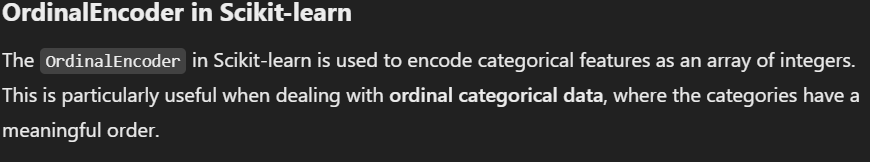

In [75]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [76]:
df['SALE_COND']=df["SALE_COND"].apply(lambda i:"AbNormal" if (i == "Ab Normal") else i)
df['SALE_COND']=df["SALE_COND"].apply(lambda i:"Partial" if (i == "Partiall" or i == "PartiaLl") else i)
df['SALE_COND']=df["SALE_COND"].apply(lambda i:"AdjLand" if (i == "Adj Land") else i)
df['PARK_FACIL']=df["PARK_FACIL"].apply(lambda i:"No" if (i == "Noo") else i)
df['BUILDTYPE']=df["BUILDTYPE"].apply(lambda i:"Commercial" if (i == "Comercial") else i)
df['BUILDTYPE']=df["BUILDTYPE"].apply(lambda i:"Others" if (i == "Other") else i)
df['UTILITY_AVAIL']=df["UTILITY_AVAIL"].apply(lambda i:"No sewage" if (i == "NoSewr " or i == "NoSeWa") else i)  #sewage
df['UTILITY_AVAIL']=df["UTILITY_AVAIL"].apply(lambda i:"AllPub" if (i == "All Pub") else i)
df['STREET']=df['STREET'].apply(lambda i:"Paved" if ( i == "Pavd") else i )
df['STREET']=df['STREET'].apply(lambda i:"No Access" if ( i == "NoAccess") else i )

In [77]:
df['AREA']=df["AREA"].apply(lambda i:"Adyar" if (i == "Adyr") else i)
df['AREA']=df["AREA"].apply(lambda i:"Velachery" if (i == "Velchery") else i)
df['AREA']=df["AREA"].apply(lambda i:"Chrompet" if (i == "Chrompt" or i == "Chrmpet" or i =="Chormpet") else i)
df['AREA']=df["AREA"].apply(lambda i:"KK Nagar" if (i == "KKNagar") else i)
df['AREA']=df["AREA"].apply(lambda i:"T Nagar" if (i == "TNagar") else i)
df['AREA']=df["AREA"].apply(lambda i:"Anna Nagar" if (i == "Ana Nagar" or i == "Ann Nagar") else i)
df['AREA']=df["AREA"].apply(lambda i:"Karapakkam" if (i == "Karapakam" ) else i)

In [78]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [80]:
from sklearn.preprocessing import OrdinalEncoder #By default, OrdinalEncoder orders categories alphabetically.
encoder = OrdinalEncoder()
df['AREA'] = encoder.fit_transform(df[['AREA']])


In [81]:
df['AREA'].unique()

array([4., 1., 0., 6., 2., 3., 5.])

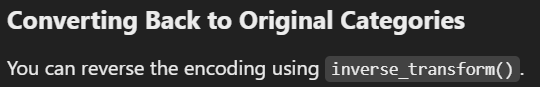


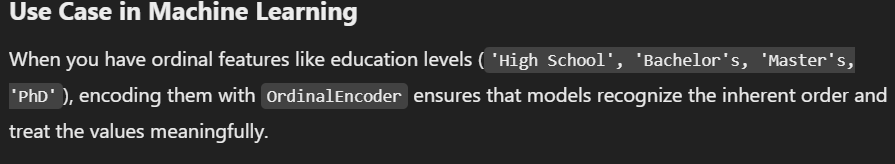

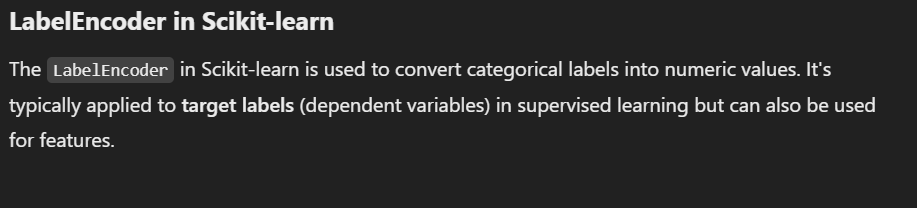

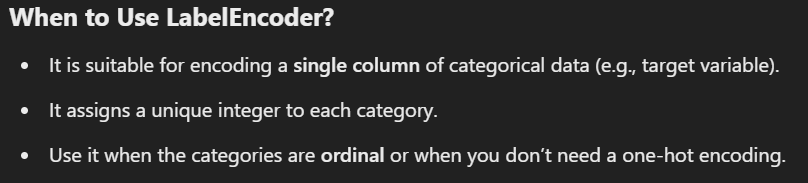

In [87]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['PARK_FACIL'] = encoder.fit_transform(df[['PARK_FACIL']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
df['PARK_FACIL'].unique()

array([1, 0])

In [89]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,4.0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,1,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1.0,1986,19-12-2006,26,2.0,1.0,5,AbNormal,0,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,0.0,909,04-02-2012,70,1.0,1.0,3,AbNormal,1,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,6.0,1855,13-03-2010,14,3.0,2.0,5,Family,0,...,No sewage,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,4.0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,1,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,4.0,598,03-01-2011,51,1.0,1.0,2,AdjLand,0,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,6.0,1897,08-04-2004,52,3.0,2.0,5,Family,1,...,No sewage,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,6.0,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,0,...,No sewage,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,4.0,787,03-08-2009,40,1.0,1.0,2,Partial,1,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


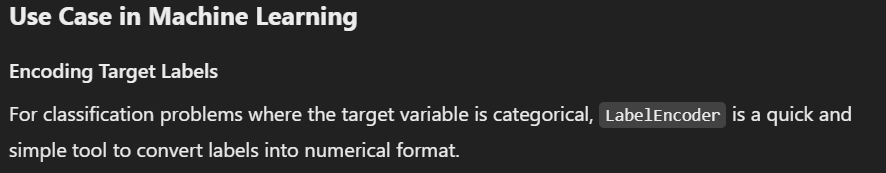

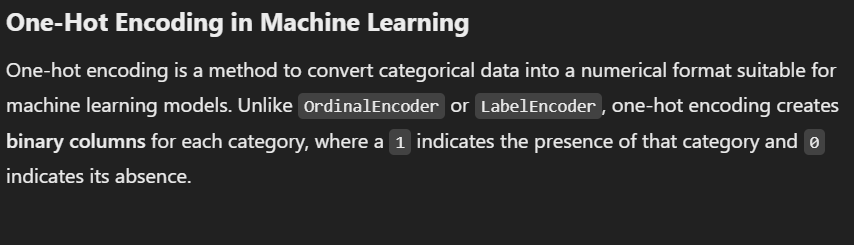

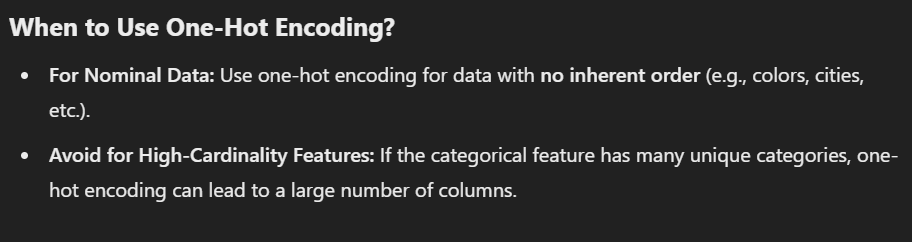

In [107]:
import pandas as pd

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Red','Red', 'Green', 'Blue', 'Red','Red', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Applying one-hot encoding
df_encoded = pd.get_dummies(df, dtype=int)

# Displaying the encoded DataFrame
print(df_encoded)

    Color_Blue  Color_Green  Color_Red
0            0            0          1
1            0            1          0
2            1            0          0
3            0            0          1
4            0            0          1
5            0            1          0
6            1            0          0
7            0            0          1
8            0            0          1
9            0            1          0
10           1            0          0
11           0            0          1
